In [1]:
from genparse import CFG, Real, examples
#from wfsa.field_wfsa import WFSA as RealWFSA
from wfsa.semiring_wfsa import WFSA as SemiringWFSA, EPSILON
from semirings import Float, Symbol
from itertools import product

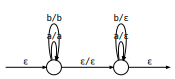

In [2]:
m = SemiringWFSA(Symbol)
m.add_I(0, Symbol.one)
for a in 'ab': m.add_arc(0, a, 0, Symbol(a))         # copy
m.add_arc(0, EPSILON, 1, Symbol.one)
for a in 'ab': m.add_arc(1, a, 1, Symbol.one)   # erase
m.add_F(1, Symbol.one)
m

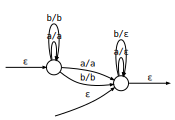

In [3]:
m.epsremove

In [4]:
cfg = CFG.from_string("""

0.4: S -> S a
0.4: S -> S b
0.1: S ->

""", Real)

In [5]:
def compose(self, fst):
    "Return a CFG denoting the composition of `self` with a finite-state transducer `fst`."
    new_start = self.S
    new = self.spawn(S = new_start)   # TODO: the output alphabet should come from the transducer!
    
    for r in self:
        for qs in product(fst.states, repeat=1+len(r.body)):
            new.add(r.w, (qs[0], r.head, qs[-1]), *((qs[i], r.body[i], qs[i+1]) for i in range(len(r.body))))
            
    for qi, wi in fst.start.items():
        for qf, wf in fst.stop.items():
            assert wi == Symbol.one
            assert wf == Symbol.one
#                new.add(wi*wf, new_start, (qi, self.S, qf))
            new.add(self.R.one, new_start, (qi, self.S, qf))

    for i, a, j, b in fst.arcs():   # change symbol `a` to symbol `b` with weight `w`
        w = self.R.one
        assert a != EPSILON
        if b == Symbol.one:
            new.add(w, (i, a, j), )
        else:
            new.add(w, (i, a, j), str(b))   # TODO: this is a hack to make the regex a string; it might fail to produce a string

    return new

In [6]:
cc = compose(cfg, m.epsremove)
cc

0.4: (0, 'S', 0) → (0, 'S', 0) (0, 'a', 0)
0.4: (0, 'S', 1) → (0, 'S', 0) (0, 'a', 1)
0.4: (0, 'S', 0) → (0, 'S', 1) (1, 'a', 0)
0.4: (0, 'S', 1) → (0, 'S', 1) (1, 'a', 1)
0.4: (1, 'S', 0) → (1, 'S', 0) (0, 'a', 0)
0.4: (1, 'S', 1) → (1, 'S', 0) (0, 'a', 1)
0.4: (1, 'S', 0) → (1, 'S', 1) (1, 'a', 0)
0.4: (1, 'S', 1) → (1, 'S', 1) (1, 'a', 1)
0.4: (0, 'S', 0) → (0, 'S', 0) (0, 'b', 0)
0.4: (0, 'S', 1) → (0, 'S', 0) (0, 'b', 1)
0.4: (0, 'S', 0) → (0, 'S', 1) (1, 'b', 0)
0.4: (0, 'S', 1) → (0, 'S', 1) (1, 'b', 1)
0.4: (1, 'S', 0) → (1, 'S', 0) (0, 'b', 0)
0.4: (1, 'S', 1) → (1, 'S', 0) (0, 'b', 1)
0.4: (1, 'S', 0) → (1, 'S', 1) (1, 'b', 0)
0.4: (1, 'S', 1) → (1, 'S', 1) (1, 'b', 1)
0.1: (0, 'S', 0) → 
0.1: (1, 'S', 1) → 
1: S → (0, 'S', 1)
1: S → (1, 'S', 1)
1: (0, 'a', 0) → a
1: (0, 'a', 1) → a
1: (0, 'b', 0) → b
1: (0, 'b', 1) → b
1: (1, 'a', 1) → 
1: (1, 'b', 1) →

In [7]:
cc.cnf

0.49999999999173106: S → 
0.20000000000000007: S → b
1.0: (0, 'b', 1) → b
0.04000000000000001: $(0, 'S', 0) → b
1.0: (0, 'b', 0) → b
1.0: (0, 'a', 1) → a
0.20000000000000007: S → a
1.0: (0, 'a', 0) → a
0.04000000000000001: $(0, 'S', 0) → a
2.0000000000000004: S → $(0, 'S', 0) (0, 'b', 1)
0.4: $(0, 'S', 0) → $(0, 'S', 0) (0, 'b', 0)
2.0000000000000004: S → $(0, 'S', 0) (0, 'a', 1)
0.4: $(0, 'S', 0) → $(0, 'S', 0) (0, 'a', 0)

In [8]:
#m = SemiringWFSA(Symbol)
#for token in 
#m.add_I(0, Symbol.one)
#for a in 'ab': m.add_arc(0, a, 0, Symbol(a))         # copy
#m.add_arc(0, EPSILON, 1, Symbol.one)
#for a in 'ab': m.add_arc(1, a, 1, Symbol.one)   # erase
#m.add_F(1, Symbol.one)
#m

In [9]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
print(f'token vocabulary size: {tokenizer.vocab_size}')

token vocabulary size: 50257


In [10]:
T = [(token_id, tokenizer.decode([token_id])) for token_id in range(tokenizer.vocab_size)]

In [11]:
sum(len(x) for _, x in T)

319329

In [12]:
import random
random.sample(T, 20)

[(20293, ' rockets'),
 (34071, ' Yuan'),
 (22809, ' atroc'),
 (21902, 'Wal'),
 (45712, ' persever'),
 (28658, ' 213'),
 (16044, 'oko'),
 (10322, ' Dub'),
 (14269, 'stat'),
 (38824, 'Ware'),
 (15166, 'о'),
 (21611, ' discovering'),
 (9763, ' backed'),
 (16817, '118'),
 (25263, ' villagers'),
 (15589, ' 1977'),
 (14390, ' threads'),
 (32988, 'DEF'),
 (23535, ' Animation'),
 (37427, 'dos')]

In [13]:
_T = [
# [38630, 'ivas'],
# [3003, 'where'],
# [3125, ' More'],
# [21800, 'BSD'],
# [38277, 'iseum'],
# [6619, ' talked'],
# [18267, 'peat'],
# [9827, ' Batman'],
 [38176, 'Union'],
# [13755, ' occupation'],
# [21824, ' grains'],
 [32199, ' poisonous'],
# [11130, ' McG'],
# [35834, ' Nordic'],
# [50179, 'artifacts'],
]

In [18]:
if 0:
    m = SemiringWFSA(Symbol)
    m.add_I('<s>', Symbol.one)
    for i, x in T: 
    #    m.add_arc('<s>', i, i, np.product([Symbol(y) for y in x]))
    
        m.add_arc('<s>', i, (i, 0), Symbol.one)
    
        for j in range(len(x)):
            m.add_arc((i,j), EPSILON, (i,j+1), Symbol(x[j]))
    
        m.add_arc((i,len(x)), EPSILON, '</s>', Symbol.one)
        
    m.add_F('</s>', Symbol.one)
    m.add_arc('</s>', EPSILON, '<s>', Symbol.one)
    #for a in 'ab': m.add_arc(0, a, 0, Symbol(a))         # copy
    #m.add_arc(0, EPSILON, 1, Symbol.one)
    #for a in 'ab': m.add_arc(1, a, 1, Symbol.one)   # erase
    #m.add_F(1, Symbol.one)
    #m

In [20]:
#len(list(m.arcs()))

In [21]:
#t = m.trim()

In [22]:
#m([32199,38176])

In [23]:
#m

In [24]:
import pynini
from pynini.lib import pynutil

In [25]:
import random
random.seed(0)
S = random.sample(T, 10)
S

[(25247, ' KC'),
 (49673, ' Mothers'),
 (27562, ' sprink'),
 (2653, ' comput'),
 (16968, ' heated'),
 (33506, ' reluctance'),
 (31845, ' grandson'),
 (26537, ' enlarg'),
 (19877, ' coordination'),
 (31234, ' emitted')]

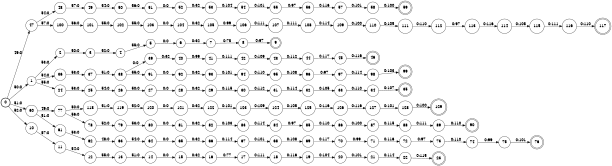

In [26]:
_lambda = pynini.string_map([(str(x), y) for x,y in S])#.optimize()
_lambda

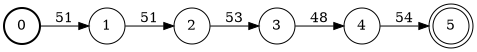

In [27]:
xs = pynini.string_map(['33506'])
xs

In [28]:
m = xs @ _lambda
m

In [29]:
list(m.paths().items())

[('33506', ' reluctance', <tropical Weight 0 at 0x754e9cf29ed0>)]

In [30]:
_lambda_star = pynutil.join(_lambda, pynutil.insert(" ")).optimize()

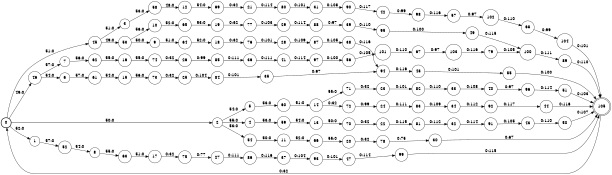

In [31]:
_lambda_star

In [33]:
# Initialize symbol tables
input_sym_table = pynini.SymbolTable()
output_sym_table = pynini.SymbolTable()

# Add symbols from S to the symbol tables
# We don't need to check for existence explicitly, as add_symbol does not duplicate symbols
for input_str, output_str in S:
    input_sym_table.add_symbol(str(input_str))
    output_sym_table.add_symbol(output_str)

# Attach symbol tables to the FST
_lambda.set_input_symbols(input_sym_table)
_lambda.set_output_symbols(output_sym_table);

In [35]:
xs.set_input_symbols(input_sym_table);

In [37]:
m

In [42]:
for s in m.states():
    for a in m.arcs(s):
        print(s, a.ilabel, a.olabel, a.weight, a.nextstate)

0 51 0 0 1
1 51 0 0 2
2 53 0 0 3
3 48 0 0 4
4 54 0 0 5
5 0 0 0 6
6 0 32 0 7
7 0 114 0 8
8 0 101 0 9
9 0 108 0 10
10 0 117 0 11
11 0 99 0 12
12 0 116 0 13
13 0 97 0 14
14 0 110 0 15
15 0 99 0 16
16 0 101 0 17


In [46]:
import pynini

# Create an empty FST using LogFst for real-valued probabilities
fst = pynini.Fst()

# Define the symbol tables for the input and output symbols
input_sym_table = pynini.SymbolTable()
output_sym_table = pynini.SymbolTable()

# Populate the symbol tables (usually done based on your specific task)
input_sym_table.add_symbol("a")
input_sym_table.add_symbol("b")
output_sym_table.add_symbol("x")
output_sym_table.add_symbol("y")

# Attach the symbol tables to the FST
fst.set_input_symbols(input_sym_table)
fst.set_output_symbols(output_sym_table)

# Add states to the FST
start_state = fst.add_state()
next_state = fst.add_state()
final_state = fst.add_state()

# Set the start and a final state
fst.set_start(start_state)
#fst.set_final(final_state, pynini.Weight("log", 0.0))  # Final weight with log semiring

# Add an arc with a real-valued weight
# Now using log weights directly
fst.add_arc(start_state, pynini.Arc(input_sym_table.find("a"), output_sym_table.find("x"), pynini.LogWeight(-0.5), next_state))
fst.add_arc(next_state, pynini.Arc(input_sym_table.find("b"), output_sym_table.find("y"), pynini.LogWeight(-1.2), final_state))

# Optimize the FST
fst.optimize()

# Your FST with log weights is ready for use

AttributeError: module 'pynini' has no attribute 'LogWeight'

In [47]:
pynini.Weight?

Init signature: pynini.Weight(self, /, *args, **kwargs)
Docstring:     
Weight(weight_type, weight_string)

FST weight class.

This class represents an FST weight. When passed as an argument to an FST
operation, it should have the weight type of the input FST(s) to said
operation.

Args:
  weight_type: A string indicating the weight type.
  weight_string: A string indicating the underlying weight.

Raises:
  FstArgError: Weight type not found.
  FstBadWeightError: Invalid weight.
File:           ~/.local/lib/python3.10/site-packages/_pywrapfst.cpython-310-x86_64-linux-gnu.so
Type:           type
Subclasses:     

In [49]:
pynini.Weight('log', '0')

<log Weight 0 at 0x754e7af4bf90>

In [ ]:
pynini.